# Devbrat Anuragi
## 17078

In [ ]:
# importing Libraries
import numpy as np
import matplotlib.pyplot as plt


## Q1. Attractive Potential of the Goal

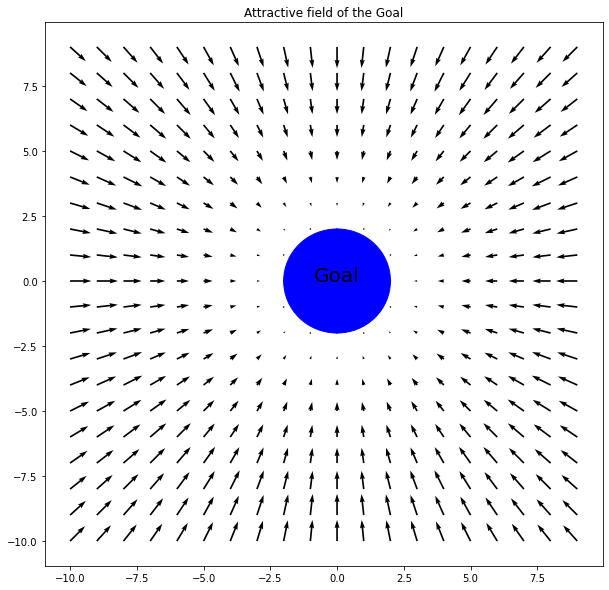

In [ ]:
# creating two evenly spaced array with ranging from 
# -10 to 10
x = np.arange(-10,10,1)
y = np.arange(-10,10,1)

# Creating the meshgrid 
X, Y = np.meshgrid(x,y)

#Creating delx and dely array
delx = np.zeros_like(X)
dely = np.zeros_like(Y)
s = 7
r=2

for i in range(len(x)):
  for j in range(len(y)):
    
    # calculating the distance asumming the goal is at Origin
    d= np.sqrt(X[i][j]**2 + Y[i][j]**2)
    #print(f"{i} and {j}")

    # calCulating the Theta
    theta = np.arctan2(Y[i][j],X[i][j])

    # Using the equations given in the class
    if d< 2:
      delx[i][j] = 0
      dely[i][j] =0
    elif d>r+s:
      delx[i][j] = -50* s *np.cos(theta)
      dely[i][j] = -50 * s *np.sin(theta)
    else:
      delx[i][j] = -50 * (d-r) *np.cos(theta)
      dely[i][j] = -50 * (d-r) *np.sin(theta)

fig, ax = plt.subplots(figsize = (10,10))
ax.quiver(X, Y, delx, dely)
ax.add_patch(plt.Circle((0, 0), 2, color='b'))
ax.annotate("Goal", xy=(0, 0), fontsize=20, ha="center")
ax.set_title('Attractive field of the Goal')
plt.show() 

## Q2. Repulsive potential fields of the obstacles
**Assuming the obstacle is at the origin**

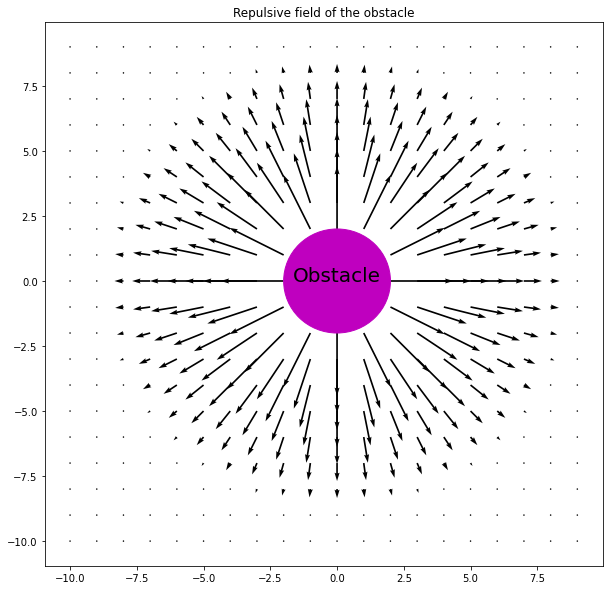

In [ ]:
# creating two evenly spaced array with ranging from 
# -10 to 10
x = np.arange(-10,10,1)
y = np.arange(-10,10,1)

# Creating the meshGrid
X, Y = np.meshgrid(x,y)

# creating the delx and Dely
delx = np.zeros_like(X)
dely = np.zeros_like(Y)
s = 7
r=2
for i in range(len(x)):
  for j in range(len(y)):
    
    
    d= np.sqrt(X[i][j]**2 + Y[i][j]**2)
    #print(f"{i} and {j}")
    theta = np.arctan2(Y[i][j],X[i][j])

    # using the Formula of avoiding obstacle
    if d< 2:
      delx[i][j] = np.sign(np.cos(theta))
      dely[i][j] = np.sign(np.cos(theta))
    elif d>r+s:
      delx[i][j] = 0
      dely[i][j] = 0
    else:
      delx[i][j] = 50 *(s+r-d)* np.cos(theta)
      dely[i][j] = 50 * (s+r-d)*  np.sin(theta)

fig, ax = plt.subplots(figsize = (10,10))
ax.quiver(X, Y, delx, dely)
ax.add_patch(plt.Circle((0, 0), 2, color='m'))
ax.annotate("Obstacle", xy=(0, 0), fontsize=20, ha="center")
ax.set_title('Repulsive field of the obstacle')
plt.show() 

## Q3. Combined Field when Goal and Obstacle are at the origin
Note: - Assuming Goal and Obstacle Overlap

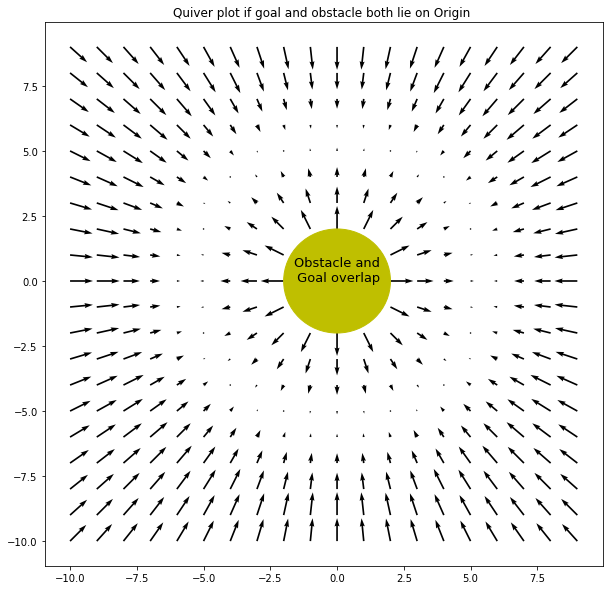

In [ ]:
x = np.arange(-10,10,1)
y = np.arange(-10,10,1)

X, Y = np.meshgrid(x,y)
delx = np.zeros_like(X)
dely = np.zeros_like(Y)
s = 7
r=2
for i in range(len(x)):
  for j in range(len(y)):
    
    d= np.sqrt(X[i][j]**2 + Y[i][j]**2)
    #print(f"{i} and {j}")
    theta = np.arctan2(Y[i][j],X[i][j])
    if d< 2:
      delx[i][j] = np.sign(np.cos(theta)) +0
      dely[i][j] = np.sign(np.cos(theta)) +0
    elif d>r+s:
      delx[i][j] = 0 +(-50 * s *np.cos(theta))
      dely[i][j] = 0 + (-50 * s *np.sin(theta))
    else:
      delx[i][j] = 50 *(s+r-d)* np.cos(theta) + (-50 * (d-r) *np.cos(theta))
      dely[i][j] = 50 * (s+r-d)*  np.sin(theta) + (-50 * (d-r) *np.sin(theta))

fig, ax = plt.subplots(figsize = (10,10))
ax.quiver(X, Y, delx, dely)
ax.add_patch(plt.Circle((0, 0), 2, color='y'))

ax.annotate("Obstacle and\n Goal overlap", xy=(0, 0), fontsize=13, ha="center")
ax.set_title('Quiver plot if goal and obstacle both lie on Origin ')
plt.show() 

## Combined Potential If obstacle and Goal are at different location

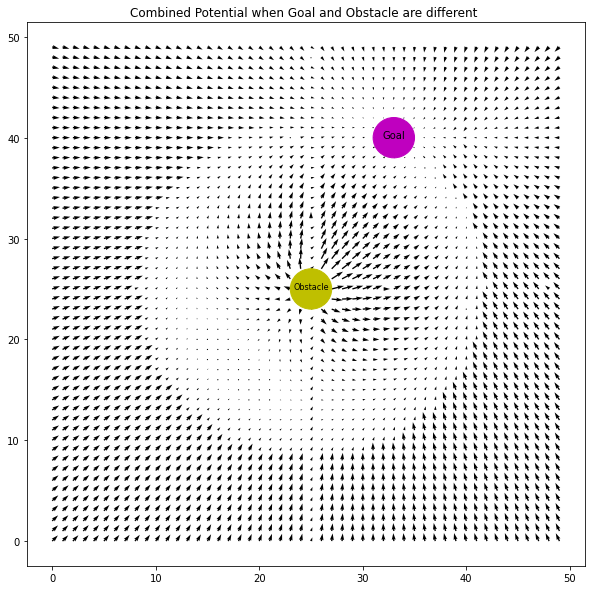

In [ ]:
x = np.arange(-0,50,1)
y = np.arange(-0,50,1)

# Goal is at (40,40) 
goal = [40,40]

#obstacle is at(25,25)
obstacle = [25,25]
X, Y = np.meshgrid(x,y)

delx = np.zeros_like(X)
dely = np.zeros_like(Y)

"""
    Inside the nested loop, distance from each point to the goal and ostacle is 
    calculated, Similarly angles are calculated. Then I simply used the formula give and 
    superimposed it to the Goals potential field.Also
    α = 50
    β = 50
    s = 15
    r = 2
"""
s = 15
r=2
for i in range(len(x)):
  for j in range(len(y)):
    
    # finding the goal distance and obstacle distance
    d_goal = np.sqrt((goal[0]-X[i][j])**2 + ((goal[1]-Y[i][j]))**2)
    d_obstacle = np.sqrt((obstacle[0]-X[i][j])**2 + (obstacle[1]-Y[i][j])**2)
    #print(f"{i} and {j}")

    #finding theta correspoding to the goal and obstacle 
    theta_goal= np.arctan2(goal[1] - Y[i][j], goal[0]  - X[i][j])
    theta_obstacle = np.arctan2(obstacle[1] - Y[i][j], obstacle[0]  - X[i][j])

    if d_obstacle < r:
      delx[i][j] = np.sign(np.cos(theta_obstacle)) +0
      dely[i][j] = np.sign(np.cos(theta_obstacle))  +0
    elif d_obstacle>r+s:
      delx[i][j] = 0 +(50 * s *np.cos(theta_obstacle))
      dely[i][j] = 0 + (50 * s *np.sin(theta_goal))
    elif d_obstacle<r+s :
      delx[i][j] = -120 *(s+r-d_obstacle)* np.cos(theta_obstacle)
      dely[i][j] = -120 * (s+r-d_obstacle)*  np.sin(theta_obstacle) 
    if d_goal <r+s:
      if delx[i][j] != 0:
        delx[i][j]  += (50 * (d_goal-r) *np.cos(theta_goal))
        dely[i][j]  += (50 * (d_goal-r) *np.sin(theta_goal))
      else:
        delx[i][j]  = (50 * (d_goal-r) *np.cos(theta_goal))
        dely[i][j]  = (50 * (d_goal-r) *np.sin(theta_goal))
        
    if d_goal>r+s:
      if delx[i][j] != 0:
        delx[i][j] += 50* s *np.cos(theta_goal)
        dely[i][j] += 50* s *np.sin(theta_goal)
      else:
        delx[i][j] = 50* s *np.cos(theta_goal)
        dely[i][j] = 50* s *np.sin(theta_goal)

fig, ax = plt.subplots(figsize=(10,10))
ax.quiver(X, Y, delx, dely)
ax.add_patch(plt.Circle((25, 25), r, color='y'))
ax.add_patch(plt.Circle((33, 40), r, color='m'))

ax.annotate("Obstacle", xy=(25, 25), fontsize=8, ha="center")
ax.annotate("Goal", xy=(33, 40), fontsize=10, ha="center")

ax.set_title('Combined Potential when Goal and Obstacle are different ')

plt.show() 

## Q4. Path taken by the Robot from (0,0) 

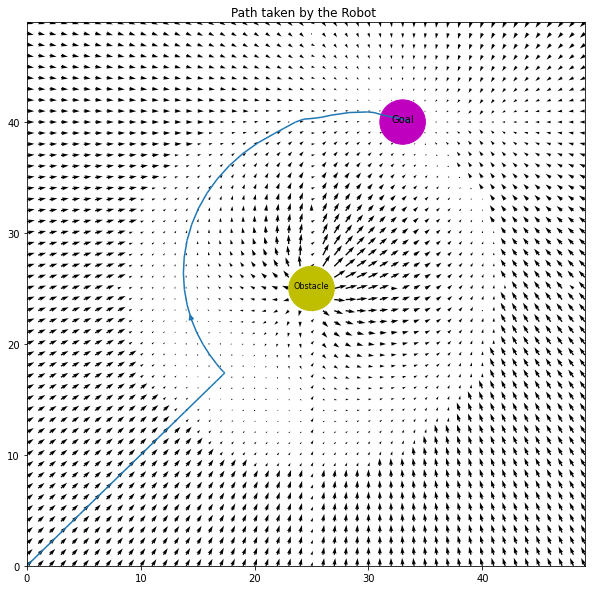

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

seek_points = np.array([[0,0]]) 
ax.streamplot(X,Y,delx,dely, start_points=seek_points)
ax.quiver(X, Y, delx, dely)
ax.add_patch(plt.Circle((25, 25), r, color='y'))
ax.add_patch(plt.Circle((33, 40), r, color='m'))

ax.annotate("Obstacle", xy=(25, 25), fontsize=8, ha="center")
ax.annotate("Goal", xy=(33, 40), fontsize=10, ha="center")

ax.set_title('Path taken by the Robot ')

plt.show() 


## Q5  Effect of increasing the number of obstacles from 1 to 10.
The location and size of the obstcle is choosen at random

In [ ]:
import random

"""
  Args:
    X =  2D array of the Points on X-axis
    Y =  2D array of the Points on Y-axis 
    r = goal size
    loc = goal location

  Return :
    delx and dely
  
  This function is to add the goal and its potential field on the graph.
  α = 50

"""
def add_goal (X, Y,s, r, loc):

  delx = np.zeros_like(X)
  dely = np.zeros_like(Y)
  for i in range(len(x)):
    for j in range(len(y)):
      
      d= np.sqrt((loc[0]-X[i][j])**2 + (loc[1]-Y[i][j])**2)
      #print(f"{i} and {j}")
      theta = np.arctan2(loc[1]-Y[i][j], loc[0] - X[i][j])
      if d< r:
        delx[i][j] = 0
        dely[i][j] =0
      elif d>r+s:
        delx[i][j] = 50* s *np.cos(theta)
        dely[i][j] = 50 * s *np.sin(theta)
      else:
        delx[i][j] = 50 * (d-r) *np.cos(theta)
        dely[i][j] = 50 * (d-r) *np.sin(theta)
  return delx, dely

In [ ]:
x = np.arange(-0,50,1)
y = np.arange(-0,50,1)
goal = random.sample(range(0, 50), 2)
s = 7
r=2
seek_points = np.array([[0,0]]) 
X, Y = np.meshgrid(x,y)
delx, dely =add_goal(X, Y,s, r , goal)

"""
  Args:
    X =  2D array of the Points on X-axis
    Y =  2D array of the Points on Y-axis 
    delx = Usual meaning
    dely = Usual Meaninig
    obj = String to tell is the object on the map is Goal or the Obstacle
    fig = Matplotlib figure
    ax = Axis of the figure
    loc = Location of the object
    r = Size of the object
    i = Number of the Object
    color = coloer of the object
    start_goal = starting point of the robot, default = (0,0)

  Returns:
    ax = axis of the figure

  This function plot the quiver plot, draw the goal/ obstacle at the given location
  whith given color and text.  
"""
def plot_graph(X, Y, delx, dely,obj, fig, ax, loc,r,i, color,start_goal=np.array([[0,0]])  ):
  
  ax.quiver(X, Y, delx, dely)
  ax.add_patch(plt.Circle(loc, r, color=color))
  ax.set_title(f'Robot path with {i} obstacles ')
  ax.annotate(obj, xy=loc, fontsize=10, ha="center")
  return ax

In [ ]:
"""
  Args:
    X =  2D array of the Points on X-axis
    Y =  2D array of the Points on Y-axis 
    delx = Usual meaning
    dely = Usual Meaninig
    goal = location of the goal 

  Return:
    delx = Usual meaning
    dely = Usual Meaninig
    obstacle = location of the obstacle 
    r = size of the obstacle 

  This function first generate the oobstacle with diameter ranging from 1 to 5 i.e. radius 
  ranging from 0.5 to 2.5 randomly. Then it generate location of the obstacle randomly.
  Then inside the nested loop, distance from each point to the goal and ostacle is 
  calculated, Similarly angles are calculated. Then I simply used the formula give and 
  superimposed it to the Goals potential field.Also
  α = 50
  β = 120
  s = 7
  
"""

def add_obstacle(X, Y , delx, dely, goal):
  s = 7

  # generating obstacle with random sizes
  r = random.randint(5,25)/10

  # generating random location of the obstacle 
  obstacle = random.sample(range(0, 50), 2)
  for i in range(len(x)):
    for j in range(len(y)):
      
      d_goal = np.sqrt((goal[0]-X[i][j])**2 + ((goal[1]-Y[i][j]))**2)
      d_obstacle = np.sqrt((obstacle[0]-X[i][j])**2 + (obstacle[1]-Y[i][j])**2)
      #print(f"{i} and {j}")
      theta_goal= np.arctan2(goal[1] - Y[i][j], goal[0]  - X[i][j])
      theta_obstacle = np.arctan2(obstacle[1] - Y[i][j], obstacle[0]  - X[i][j])
      if d_obstacle < r:
        delx[i][j] = -1*np.sign(np.cos(theta_obstacle))*5 +0
        dely[i][j] = -1*np.sign(np.cos(theta_obstacle))*5  +0
      elif d_obstacle>r+s:
        delx[i][j] += 0 -(50 * s *np.cos(theta_goal))
        dely[i][j] += 0 - (50 * s *np.sin(theta_goal))
      elif d_obstacle<r+s :
        delx[i][j] += -150 *(s+r-d_obstacle)* np.cos(theta_obstacle)
        dely[i][j] += -150 * (s+r-d_obstacle)*  np.sin(theta_obstacle) 
      if d_goal <r+s:
        if delx[i][j] != 0:
          delx[i][j]  += (50 * (d_goal-r) *np.cos(theta_goal))
          dely[i][j]  += (50 * (d_goal-r) *np.sin(theta_goal))
        else:
          
          delx[i][j]  = (50 * (d_goal-r) *np.cos(theta_goal))
          dely[i][j]  = (50 * (d_goal-r) *np.sin(theta_goal))
          
      if d_goal>r+s:
        if delx[i][j] != 0:
          delx[i][j] += 50* s *np.cos(theta_goal)
          dely[i][j] += 50* s *np.sin(theta_goal)
        else:
          
          delx[i][j] = 50* s *np.cos(theta_goal)
          dely[i][j] = 50* s *np.sin(theta_goal) 
      if d_goal<r:
          delx[i][j] = 0
          dely[i][j] = 0
   
  return delx, dely, obstacle, r

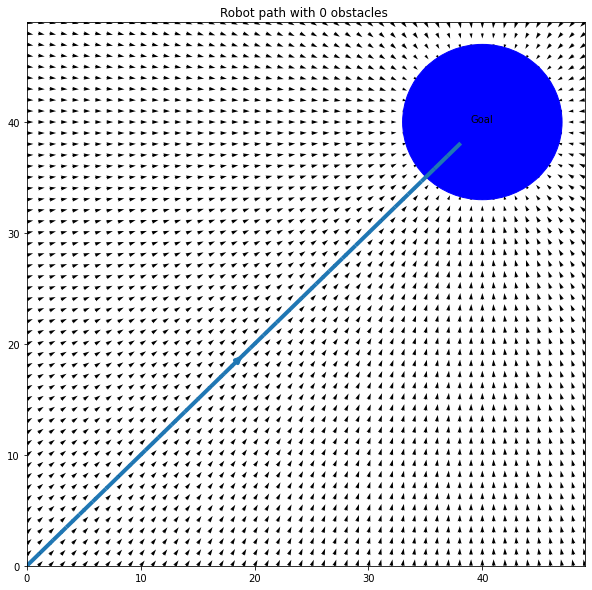

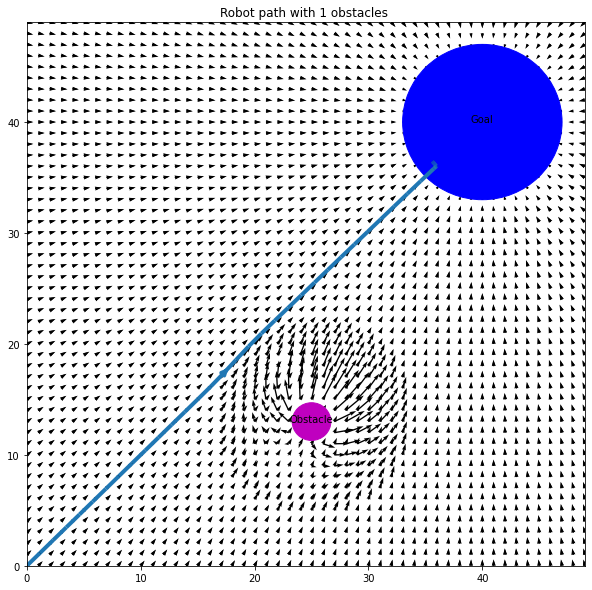

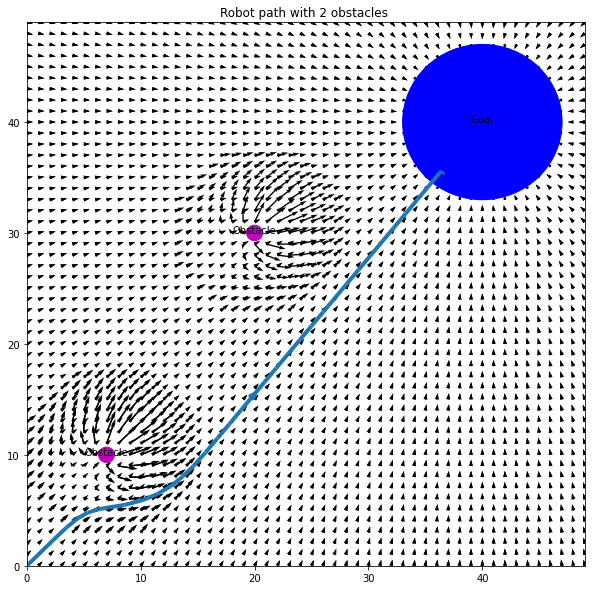

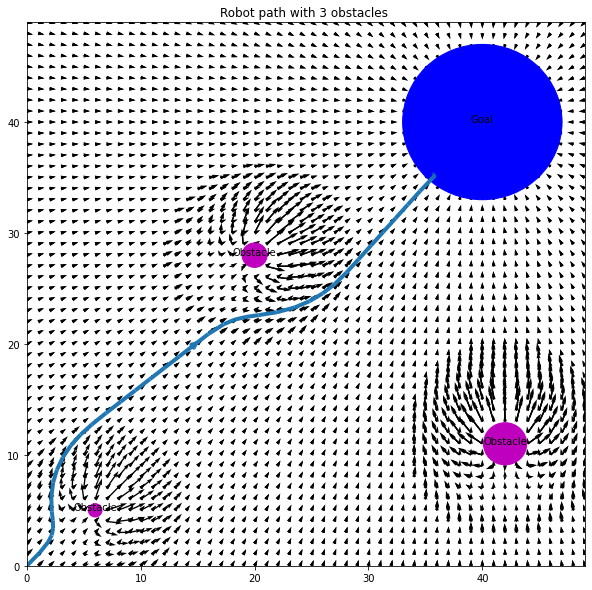

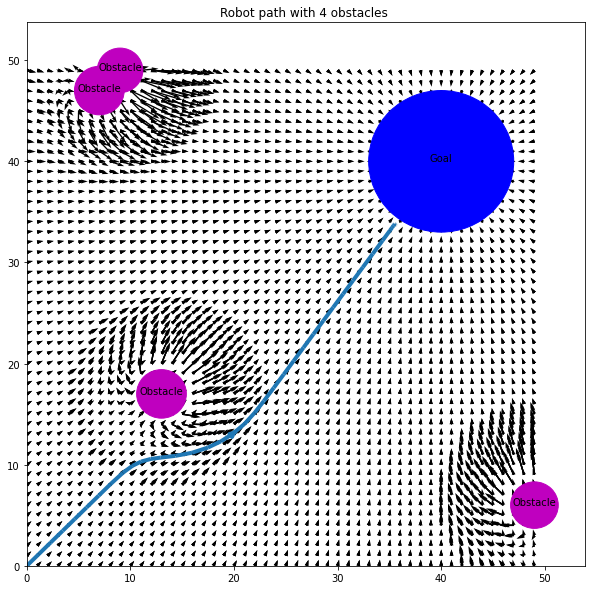

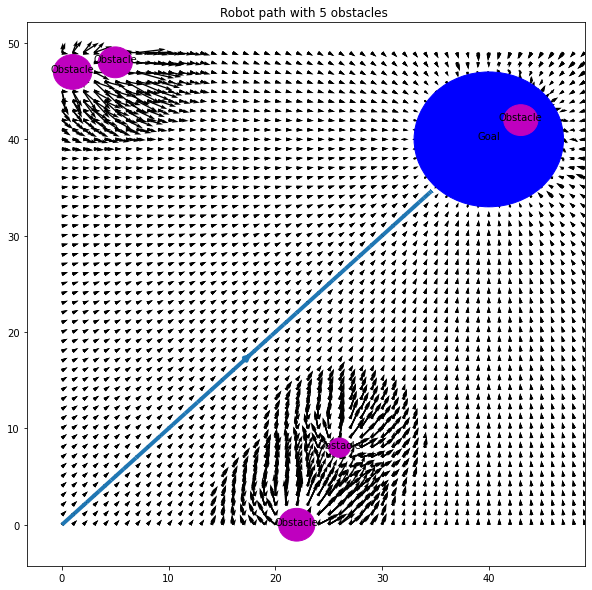

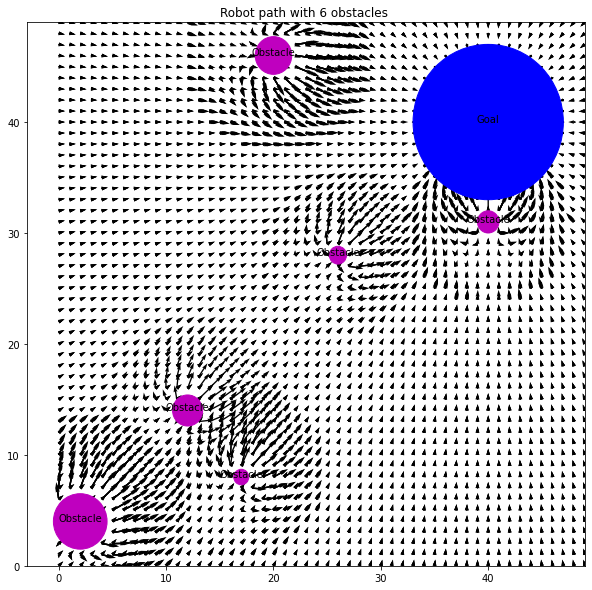

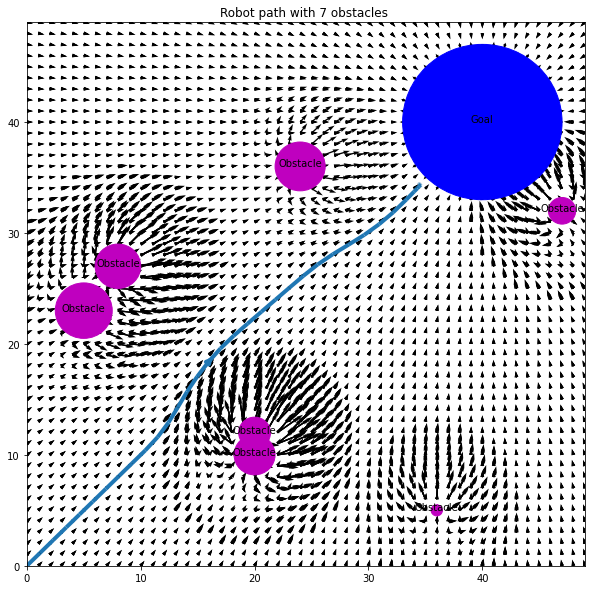

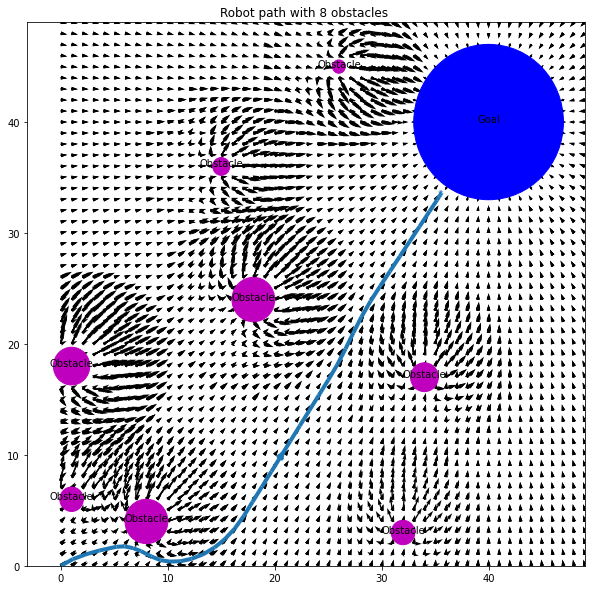

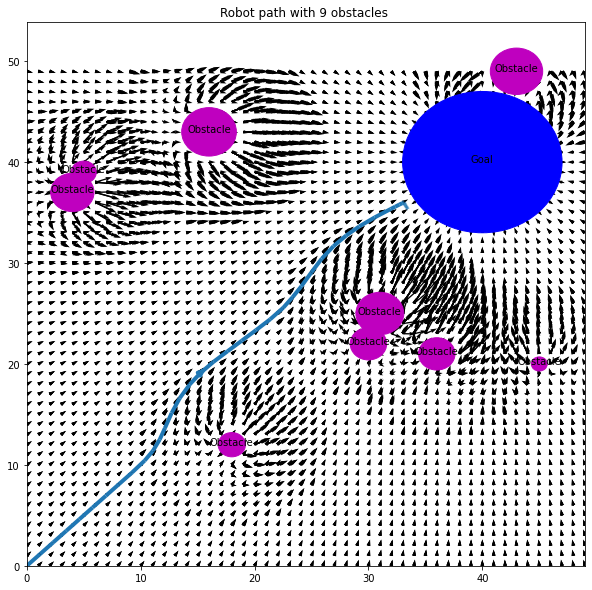

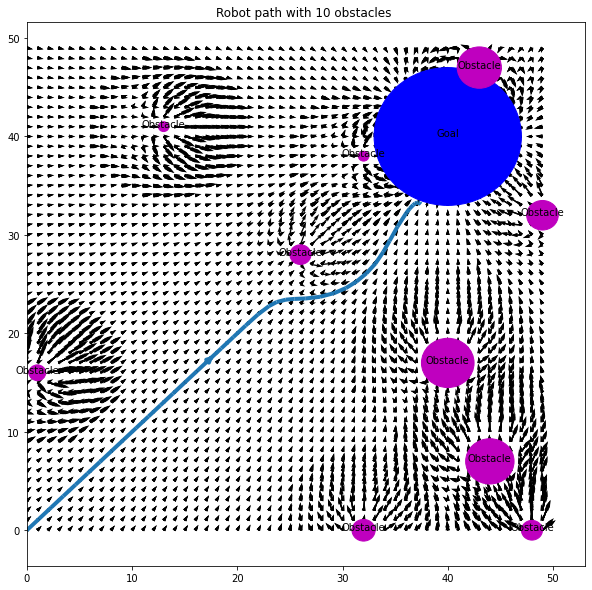

In [ ]:
"""
    Ploting 10 plots with increasing number of the obstacles, Goal is fixed at (40,40), 
    size of the goal is fixed to 7
"""

for i in range(11):
  fig, ax = plt.subplots(figsize = (10,10))
  for _ in range(1):
    goal = [40,40]
    delx, dely =add_goal(X, Y,s, r , goal)
    
    plot_graph(X, Y, delx, dely , 'Goal',fig, ax, goal, 7,0, 'b' )
    
    for j in range(i):
      delx, dely, loc, r = add_obstacle(X,Y, delx,dely,goal)
      plot_graph(X, Y, delx, dely , 'Obstacle',fig, ax, loc, r , j+1,'m')
      #ax.add_patch(plt.Circle(loc, 2, color='m'))
    ax.streamplot(X,Y,delx,dely, start_points=seek_points,linewidth=4, cmap='autu')
    
  plt.show()